## 3.0 Data scaling and K-Means model + parameter optimization
- **Import libraries:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

- **Show higher amount of columns and rows in a pandas data frame:**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)

- **Import in a pandas data frame the csv cleaned and featured file:**

In [3]:
df = pd.read_csv("C:\\Users\\aless\\Desktop\\JATO\\Dataframe\\Final\\df_pre_processed.csv")

Now I will scale the entire dataframe using standardscaler as method:
- StandardScaler is chosen because it effectively handles different feature scales, centers the data, and scales to unit variance. This makes it a robust choice for k-means clustering, which relies on distance calculations, and for PCA, ensuring that the components reflect the true structure of the data without bias towards features with larger scales.

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

After the scaling process I will use PCA as variable selection having in my data frame more than 80 variables

In [5]:
pca = PCA(n_components = 5)
df_pca = pca.fit_transform(df_scaled )

Afterwards I select the best parameters for K means model using the elbow method

In [6]:
# Sum of Squared Errors
sse = []

# range of K values from 1 to 5:
k_values = range(1, 50)

# For each of the items of the range described above I calculate the sse value:
for k in tqdm(k_values, desc="Calculating SSE for different k values"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

Calculating SSE for different k values: 100%|██████████████████████████████████████████████████████████████████████████████| 49/49 [04:52<00:00,  5.97s/it]


Here I show the curve obtained and from this view I will chose the best parameter to be applied to K Means:

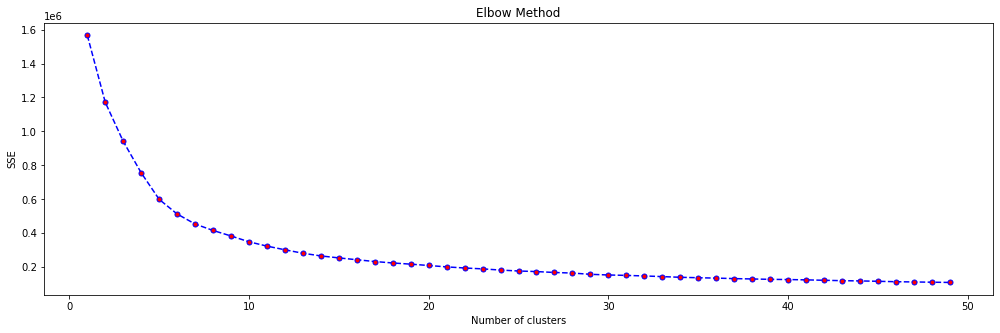

In [7]:
plt.rcParams["figure.figsize"] = (17,5)
plt.plot(k_values, sse, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

From the elbow method the optimal k identifies is around 6

In [8]:
# Fit the k-means model with the optimal number of clusters I have just identified using the elbow method:
optimal_k = 6
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)

# Fitting k-means
kmeans.fit(df_pca)

KMeans(n_clusters=6, random_state=42)

In [9]:
# Assigning clusters to the original dataframe:
df['Cluster'] = kmeans.predict(df_pca)

Finally I want to visualize the clusters using a scatterplot and using rainbow as color map:

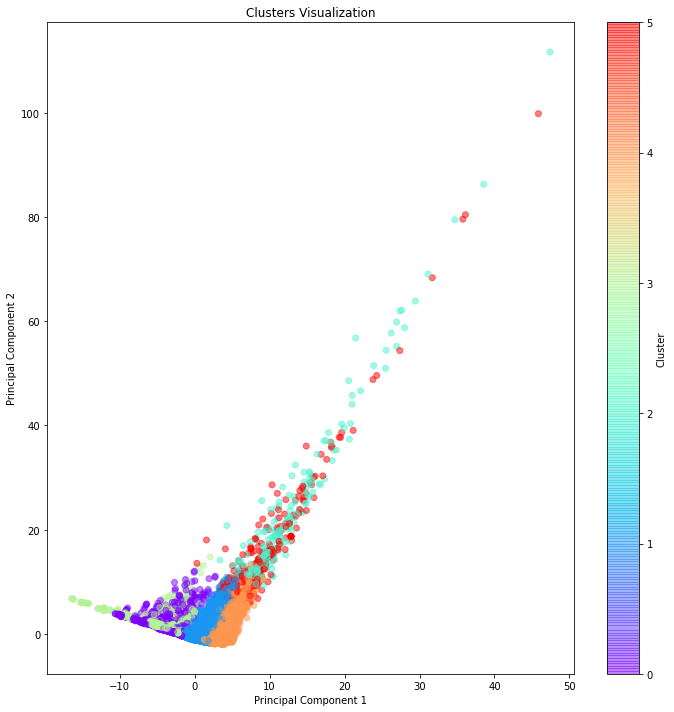

In [10]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(df_pca[:, 0], 
                      df_pca[:, 1], 
                      c=df['Cluster'], 
                      cmap='rainbow', 
                      alpha=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.tight_layout()
plt.show()

Since this above plot is not clearly showing the clusters identified by K Means I will now adopt a 3D visualization method to better shows the different ones:

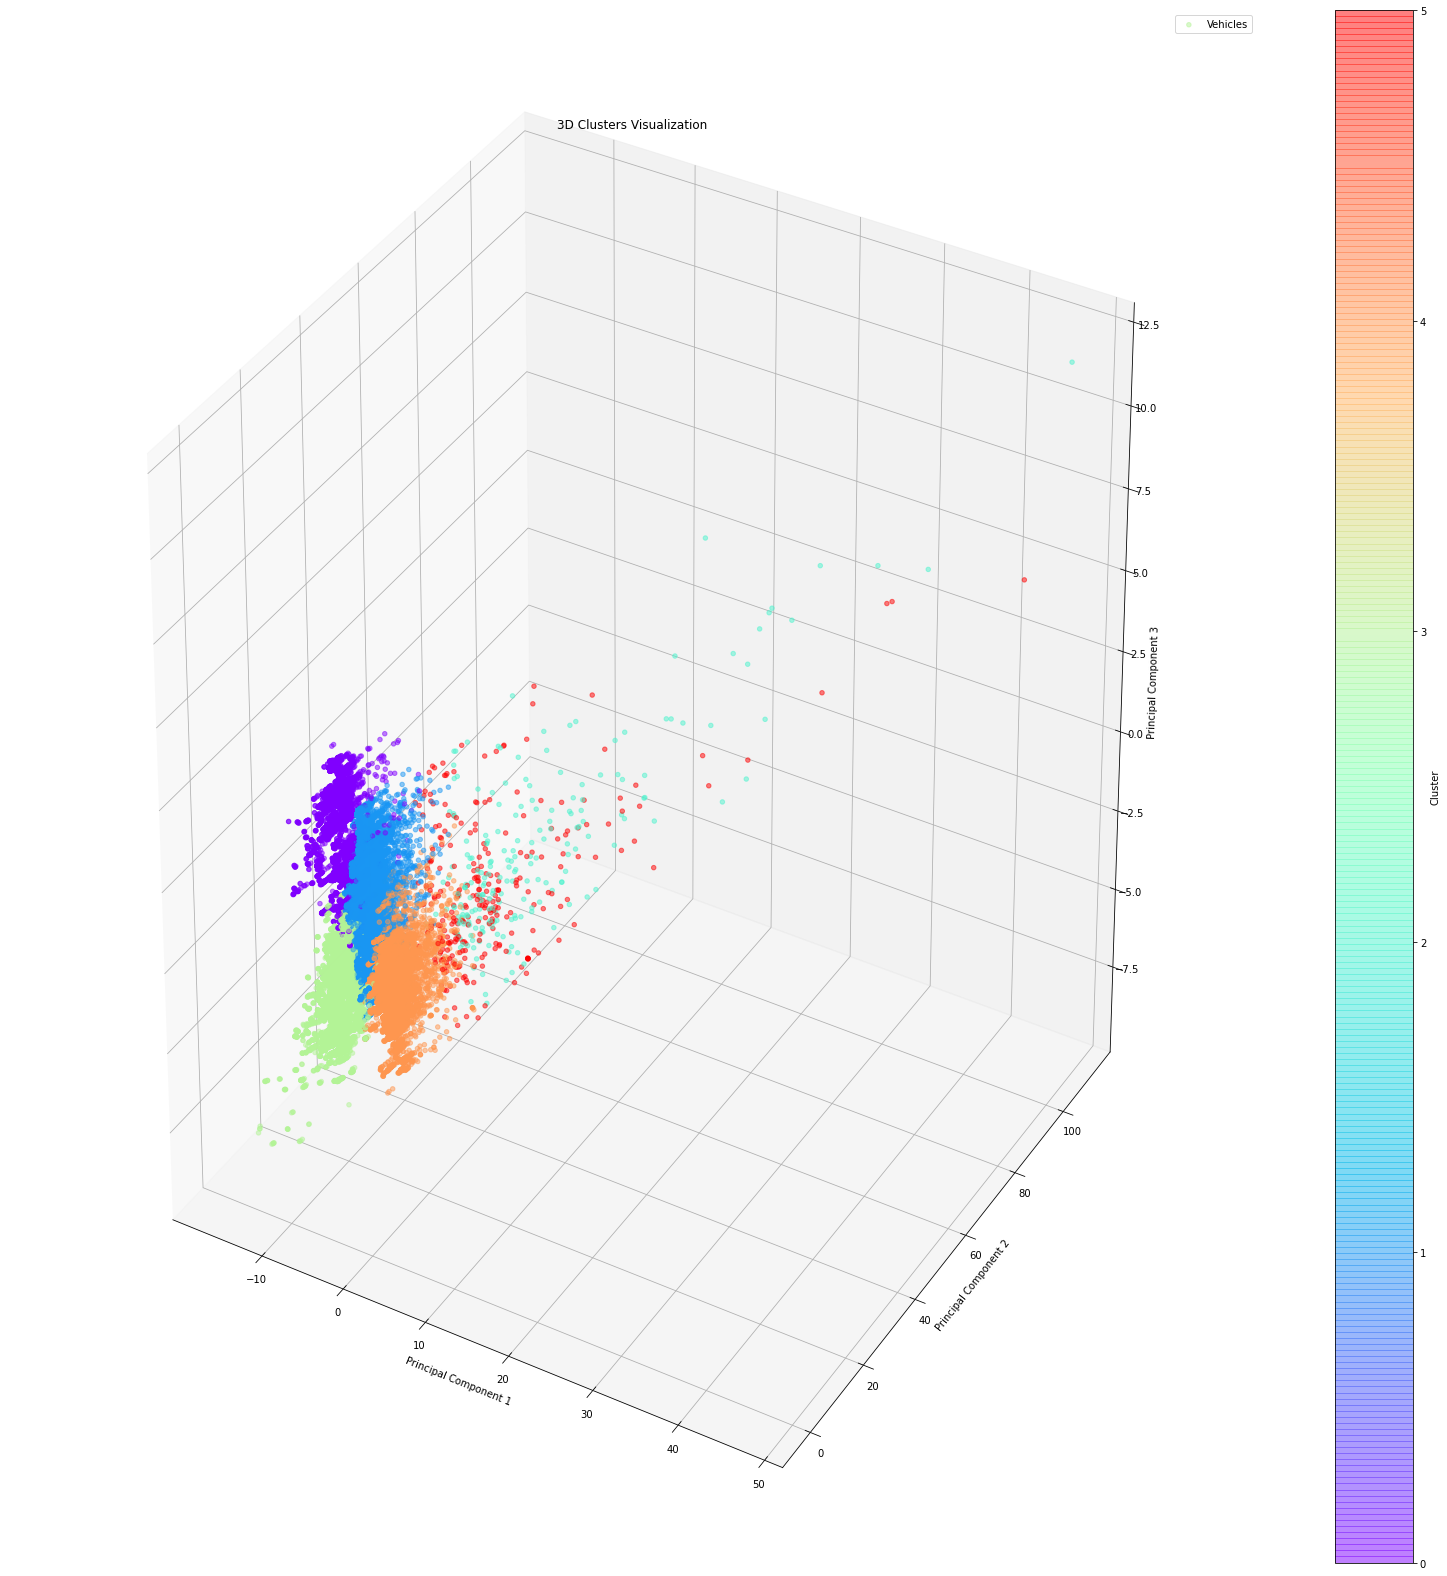

In [11]:
fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], 
                     df_pca[:, 1], 
                     df_pca[:, 2], 
                     c=df['Cluster'], 
                     cmap='rainbow', 
                     alpha=0.5, 
                     label='Vehicles')  
plt.colorbar(scatter, label='Cluster')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters Visualization')
ax.legend()
plt.tight_layout()
plt.show()

Now I want to visualize the centroids of the clusters using a X symbol:

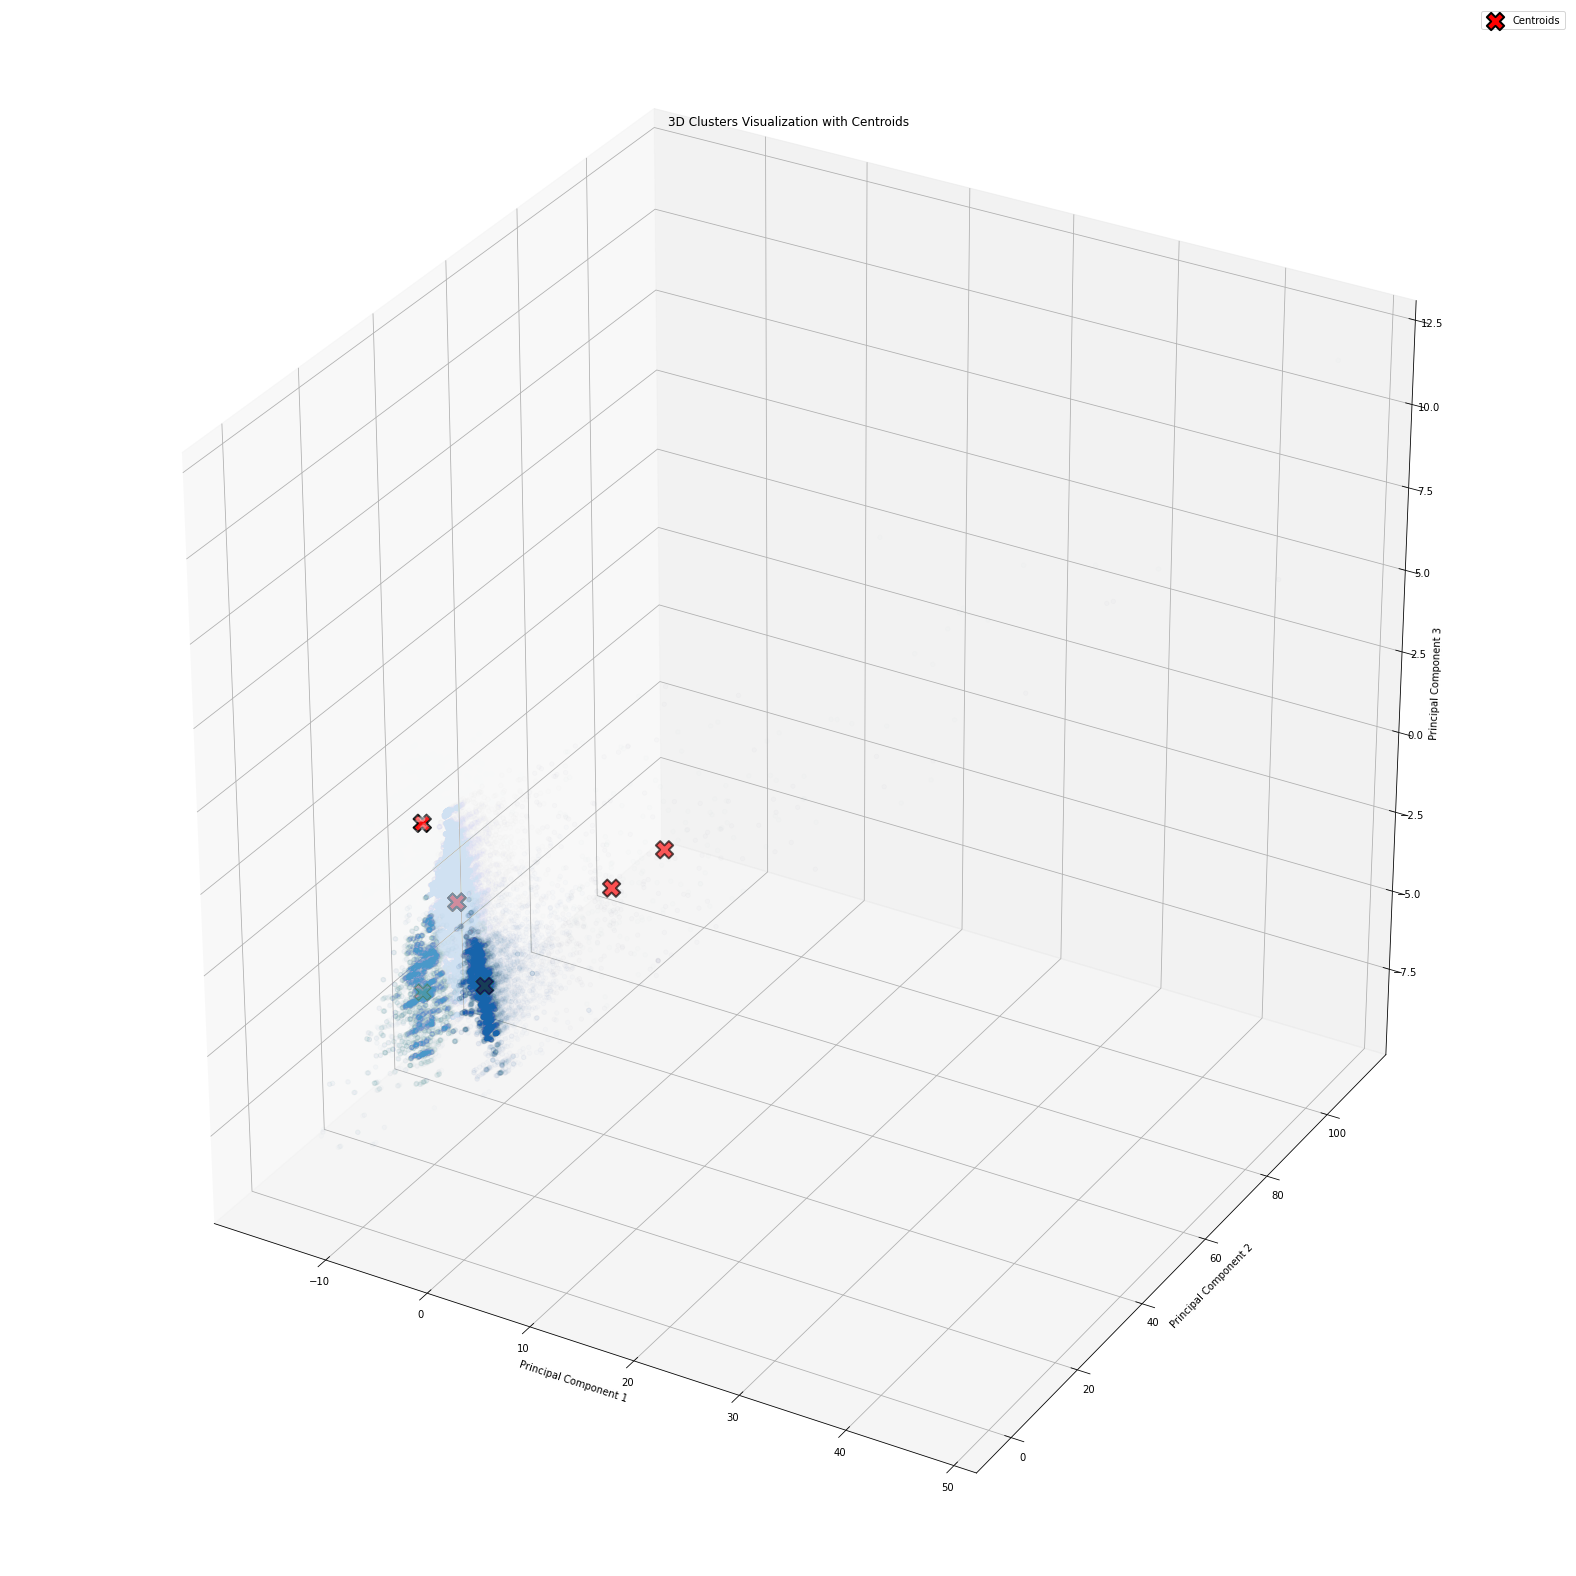

In [12]:
fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], 
                     df_pca[:, 1], 
                     df_pca[:, 2], 
                     c=df['Cluster'], 
                     cmap='Blues', 
                     alpha=0.01)

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], 
           centroids[:, 1], 
           centroids[:, 2], 
           c='red', 
           marker='X', 
           s=300, 
           label='Centroids', 
           edgecolor='k', 
           linewidth=2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters Visualization with Centroids')
ax.legend()
plt.tight_layout()
plt.show()

Evaluate clustering with silhouette score

In [13]:
sil_score = silhouette_score(df_pca, df['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4298570189866824


- Solution 1: With 15 PCA and 8 as clusters I got 0.23;
- **Solution 2: With 5 PCA and 6 as clusters I got 0.43**;
- Solution 3: With 10 PCA and 7 as clusters I got 0.28;
- Solution 4: With 10 PCA and 5 as clusters I got 0.25;

So, the best solution found so far is the one with in total 6 clusters having scored a silhouette score equals to 0.43.